In [60]:
# Data manipulation and analysis libraries
import pandas as pd  # DataFrame handling
import numpy as np   # Numerical operations

# Data visualization libraries
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # General plotting

# Text processing and natural language processing libraries
import re  # Regular expressions
import string  # String operations
from string import punctuation  # Punctuation for text processing
import nltk  # Natural Language Toolkit for text processing

# Machine learning libraries
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer  # Convert text to token counts
from sklearn.feature_extraction.text import TfidfTransformer  # Transform counts to TF-IDF features
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.pipeline import Pipeline  # Pipeline for combining steps
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to TF-IDF features
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.metrics import accuracy_score, classification_report  # Evaluation metrics

# Deep learning libraries
import tensorflow as tf  # TensorFlow library
from tensorflow.keras.models import Sequential  # Sequential model type
from tensorflow.keras.layers import Dense, Activation, Dropout  # Neural network layers
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping callback

# Miscellaneous
from sklearn.utils import resample  # Resampling data
from ast import increment_lineno  # AST utility (although not used in the code)
import warnings  # To handle warnings
warnings.filterwarnings('ignore')  # Ignore warnings
import os  # Operating system interaction




In [61]:
# Load the dataset from the specified CSV file into a DataFrame named df1
df1 = pd.read_csv('/content/drive/MyDrive/Theses/Recipe Reviews and User Feedback Dataset.csv')

In [62]:
# Get the dimensions of the DataFrame df1 (number of rows and columns)
df1.shape

(18182, 15)

In [63]:
# Display summary information about the DataFrame df1, including the number of non-null entries and data types of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [64]:
 # Display the first 5 rows of the DataFrame df1 to preview the data
 df1.head(5)

Unnamed: 0  recipe_number  recipe_code         recipe_name  \
0           0              1        14299  Creamy White Chili   
1           1              1        14299  Creamy White Chili   
2           2              1        14299  Creamy White Chili   
3           3              1        14299  Creamy White Chili   
4           4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1     Mark467               50  1665277687            0          7   
2  Barbara566               10  1664404557            0          3   
3  jeansch123                1  1661787808            2          2   
4    camper77               10  1664913823            1          7   

   thumbs_down  stars  best_score  \
0            0      5         527   
1            0      5         724   
2            0      5         710   
3            0      0         581   
4            0      0         820   

                                                text  
0  I tweaked it a little, removed onions because ...  
1  Bush used to have a white chili bean and it ma...  
2  I have a very complicated white chicken chili ...  
3  In your introduction, you mentioned cream chee...  
4  Wonderful! I made this for a &#34;Chili/Stew&#...

In [65]:
# Drop specified columns from the DataFrame df1 to remove unnecessary data.
df1.drop(columns = ['Unnamed: 0','recipe_code','comment_id','user_id','user_name','created_at','reply_count'], inplace = True)

In [66]:
# Install the ydata-profiling package for generating interactive data profiling reports
!pip install ydata-profiling

In [67]:
# Import the ProfileReport class from the ydata_profiling library to create detailed data profiling reports.
from ydata_profiling import ProfileReport

In [68]:
# Create a detailed data profiling report for the DataFrame df1 using YData Profiling.
profile = ProfileReport(df1, title="YData Profiling Report", explorative=True)

In [69]:
# Display the report.
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
# Save the report as an HTML file
profile.to_file("ydata_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
# Import the files module from google.colab to facilitate file downloads
# Download the generated YData Profiling report as an HTML file to the local machine
from google.colab import files
files.download("ydata_profiling_report.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# Create a new DataFrame df that is a copy of df1.
df = df1

In [73]:
# Check for missing values.
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 recipe_number      0
recipe_name        0
user_reputation    0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64


In [74]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
recipe_number      0.000
recipe_name        0.000
user_reputation    0.000
thumbs_up          0.000
thumbs_down        0.000
stars              0.000
best_score         0.000
text               0.011
dtype: float64


In [75]:
# Handling missing values
# Drop rows with missing text
df = df.dropna(subset=['text'])

In [76]:
# Print the count of missing values in each column of the DataFrame df after handling the missing data
print("Missing Values after handling:\n", df.isnull().sum())

Missing Values after handling:
 recipe_number      0
recipe_name        0
user_reputation    0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64


In [77]:
# Frequency counts for categorical columns
print("Recipe Name Frequency:\n", df['recipe_name'].value_counts())

Recipe Name Frequency:
 recipe_name
Cheeseburger Soup               724
Creamy White Chili              654
Best Ever Banana Bread          509
Enchilada Casser-Ole!           421
Basic Homemade Bread            397
                               ... 
Peanut Butter Cup Cheesecake     96
Blueberry French Toast           90
Caramel Heavenlies               86
Lime Chicken Tacos               86
Vegetarian Linguine              31
Name: count, Length: 100, dtype: int64


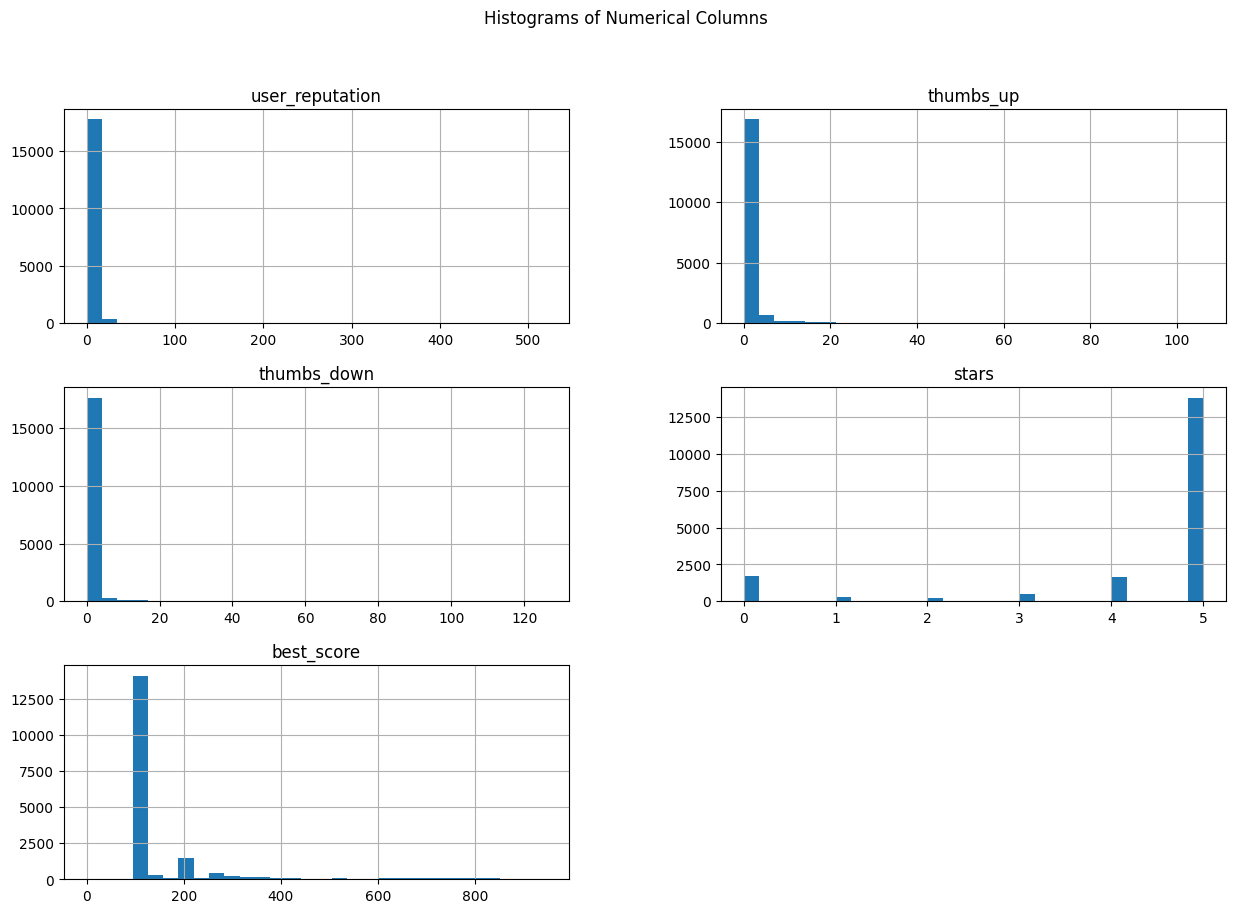

In [78]:
# Distribution Analysis
# Histograms for numerical columns
numerical_columns = ['user_reputation', 'thumbs_up', 'thumbs_down', 'stars', 'best_score']
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

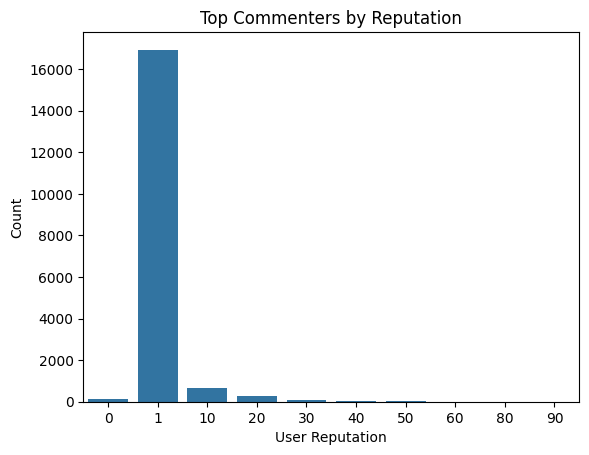

In [79]:
# Top commenters by number of comments
top_commenters = df['user_reputation'].value_counts().head(10)
sns.barplot(x=top_commenters.index, y=top_commenters.values)
plt.title('Top Commenters by Reputation')
plt.xlabel('User Reputation')
plt.ylabel('Count')
plt.show()

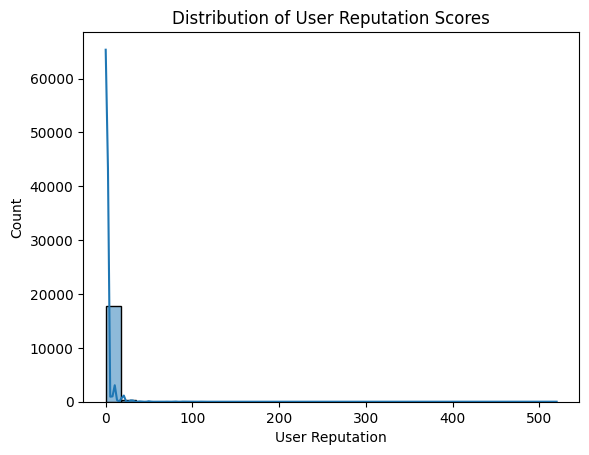

In [80]:
# Distribution of user reputation scores
sns.histplot(df['user_reputation'], bins=30, kde=True)
plt.title('Distribution of User Reputation Scores')
plt.xlabel('User Reputation')
plt.show()

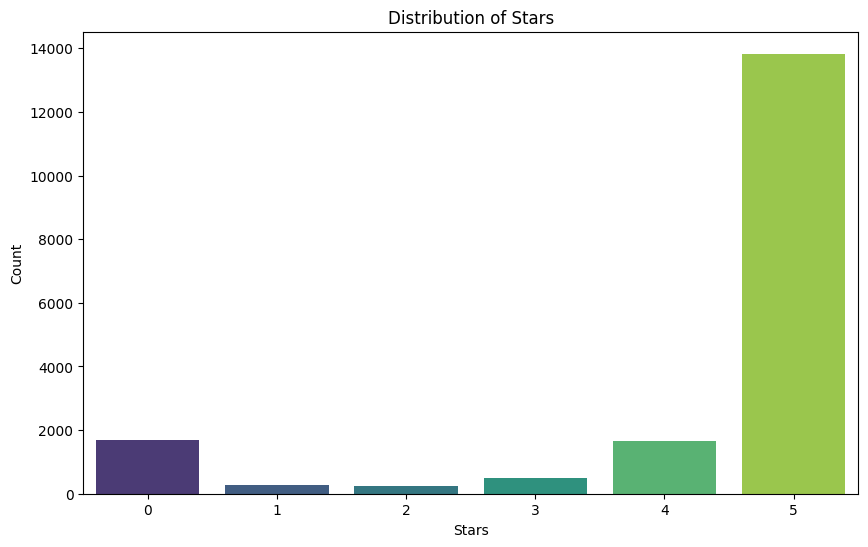

In [81]:
# Visualization
# 1. Distribution of Stars
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

In [82]:
#Finding the percentage distribution of each rating - divide the number of records for each rating by total number of records
print(f"Rating value count - percentage distribution: \n{round(df['stars'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
stars
5    76.06
0     9.33
4     9.10
3     2.70
1     1.54
2     1.28
Name: count, dtype: float64


In [83]:
# Import the plotly.express module and alias it as px for creating interactive visualizations
import plotly.express as px

In [84]:
# Get the normalized value counts (percentage) of the 'stars' column
tags = df['stars'].value_counts(normalize=True) * 100
tags_df = tags.reset_index()
tags_df.columns = ['Stars', 'Percentage']

# Create the pie chart with Plotly
fig = px.pie(tags_df, names='Stars', values='Percentage',
             title='Distribution of Stars',
             color='Stars',  # Optional: add colors to differentiate slices
             hole=0.3)  # Optional: make it a donut chart

# Update layout for better visualization
fig.update_layout(showlegend=True,
                  legend_title='Stars',
                  legend=dict(x=0.8, y=0.5))

# Show plot
fig.show()

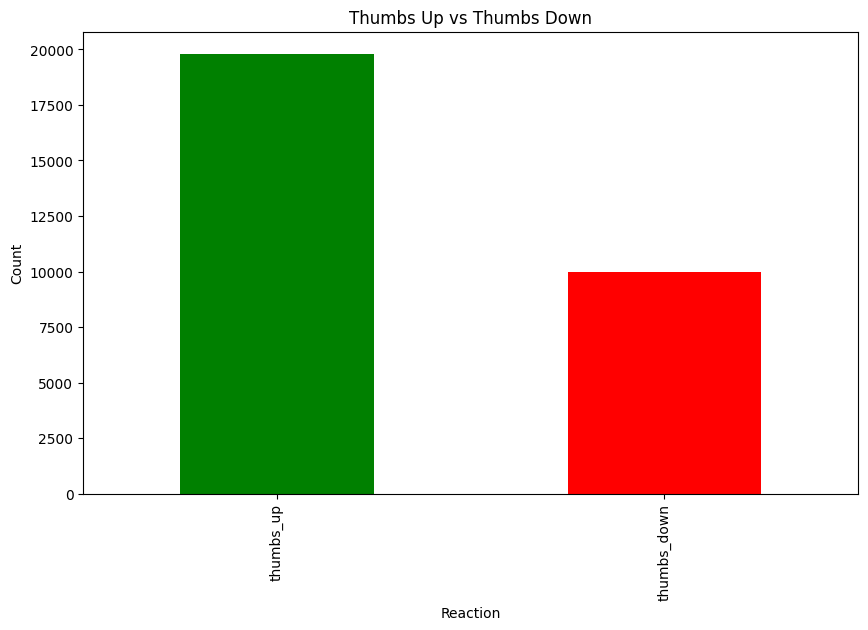

In [85]:
# Plotting the total counts of 'Thumbs Up' and 'Thumbs Down' reactions
plt.figure(figsize=(10, 6))
df[['thumbs_up', 'thumbs_down']].sum().plot(kind='bar', color=['green', 'red'])
plt.title('Thumbs Up vs Thumbs Down')
plt.xlabel('Reaction')
plt.ylabel('Count')
plt.show()

In [86]:
# Average stars given
average_stars = df['stars'].mean()
print(f"Average Stars: {average_stars}")

Average Stars: 4.288723872387239


In [87]:
# Display the first two rows of the Data.
df.head(2)

recipe_number         recipe_name  user_reputation  thumbs_up  thumbs_down  \
0              1  Creamy White Chili                1          0            0   
1              1  Creamy White Chili               50          7            0   

   stars  best_score                                               text  
0      5         527  I tweaked it a little, removed onions because ...  
1      5         724  Bush used to have a white chili bean and it ma...

In [88]:
# Group the DataFrame by 'recipe_name' and calculate the average 'stars' rating for each recipe
avg_stars_per_recipe = df.groupby('recipe_name')['stars'].mean()
print(avg_stars_per_recipe)
avg_stars_per_recipe

recipe_name
Amish Breakfast Casserole    4.526627
Apple Pie                    4.082988
Asian Chicken Thighs         4.525641
Bacon Macaroni Salad         4.291667
Baked Mushroom Chicken       4.453947
                               ...   
Vegetarian Linguine          4.419355
White Bean Chicken Chili     4.045113
Winning Apple Crisp          3.927835
Zucchini Cupcake             4.371747
Zucchini Pizza Casserole     4.632530
Name: stars, Length: 100, dtype: float64


recipe_name
Amish Breakfast Casserole    4.526627
Apple Pie                    4.082988
Asian Chicken Thighs         4.525641
Bacon Macaroni Salad         4.291667
Baked Mushroom Chicken       4.453947
                               ...   
Vegetarian Linguine          4.419355
White Bean Chicken Chili     4.045113
Winning Apple Crisp          3.927835
Zucchini Cupcake             4.371747
Zucchini Pizza Casserole     4.632530
Name: stars, Length: 100, dtype: float64

In [89]:
# Function to clean text by converting to lowercase, and removing square brackets, numbers, and punctuation
def text_clean_1(text):
    text = str(text).lower()  # Convert the text to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove all punctuation
    text = re.sub('\w*\d\w*', '', text)  # Remove any word containing numbers
    return text  # Return the cleaned text

In [90]:
# Apply the text_clean_1 function to each entry in the 'text' column to create a new 'cleaned_text' column
df['cleaned_text'] = df['text'].apply(text_clean_1)  # Apply the cleaning function to the 'text' column and store the results in 'cleaned_text'

In [91]:
# Display the first 3 rows of the DataFrame
df.head(3)

recipe_number         recipe_name  user_reputation  thumbs_up  thumbs_down  \
0              1  Creamy White Chili                1          0            0   
1              1  Creamy White Chili               50          7            0   
2              1  Creamy White Chili               10          3            0   

   stars  best_score                                               text  \
0      5         527  I tweaked it a little, removed onions because ...   
1      5         724  Bush used to have a white chili bean and it ma...   
2      5         710  I have a very complicated white chicken chili ...   

                                        cleaned_text  
0  i tweaked it a little removed onions because o...  
1  bush used to have a white chili bean and it ma...  
2  i have a very complicated white chicken chili ...

In [92]:
# Function to remove quotes, ellipses, newline characters, and other specified characters from text
def text_clean_2(text):
    text = re.sub('["“”...]', '', text)  # Remove quotes, ellipses, and other specified characters
    text = re.sub('\n', '', text)         # Remove newline characters
    return text  # Return the cleaned text

# Define a lambda function that applies text_clean_2 to the input text
cleaned2 = lambda x: text_clean_2(x)


In [93]:
# Apply the text_clean_2 function to the 'cleaned_text' column and create a new 'cleaned_text_new' column
df['cleaned_text_new'] = pd.DataFrame(df['cleaned_text'].apply(cleaned2))
df.head(3)

recipe_number         recipe_name  user_reputation  thumbs_up  thumbs_down  \
0              1  Creamy White Chili                1          0            0   
1              1  Creamy White Chili               50          7            0   
2              1  Creamy White Chili               10          3            0   

   stars  best_score                                               text  \
0      5         527  I tweaked it a little, removed onions because ...   
1      5         724  Bush used to have a white chili bean and it ma...   
2      5         710  I have a very complicated white chicken chili ...   

                                        cleaned_text  \
0  i tweaked it a little removed onions because o...   
1  bush used to have a white chili bean and it ma...   
2  i have a very complicated white chicken chili ...   

                                    cleaned_text_new  
0  i tweaked it a little removed onions because o...  
1  bush used to have a white chili bean and it ma...  
2  i have a very complicated white chicken chili ...

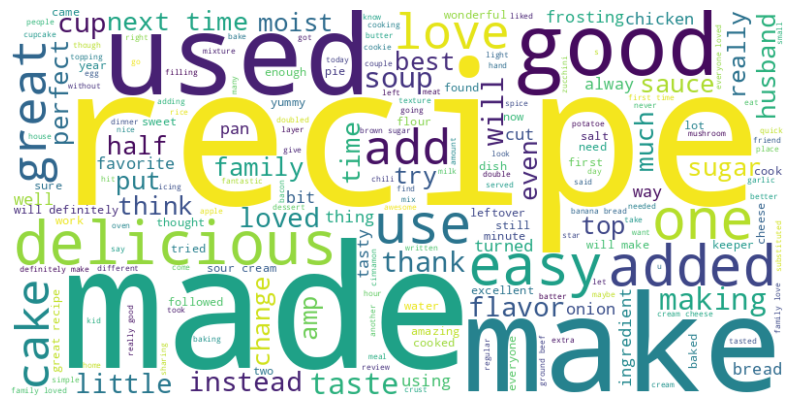

In [94]:
from wordcloud import WordCloud
# Extract unique text values from the 'cleaned_text_new' column
unique_values = df['cleaned_text_new'].unique()

# Combine the unique values into a single string
text_combined = ' '.join(unique_values)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
# Add a new 'Sentiment' column based on the 'stars' column
# Assign 'positive' if 'stars' is greater than 3, otherwise 'negative'
df['Sentiment'] = df['stars'].apply(lambda x: 'positive' if x > 3 else 'negative')

df.head(3)

recipe_number         recipe_name  user_reputation  thumbs_up  thumbs_down  \
0              1  Creamy White Chili                1          0            0   
1              1  Creamy White Chili               50          7            0   
2              1  Creamy White Chili               10          3            0   

   stars  best_score                                               text  \
0      5         527  I tweaked it a little, removed onions because ...   
1      5         724  Bush used to have a white chili bean and it ma...   
2      5         710  I have a very complicated white chicken chili ...   

                                        cleaned_text  \
0  i tweaked it a little removed onions because o...   
1  bush used to have a white chili bean and it ma...   
2  i have a very complicated white chicken chili ...   

                                    cleaned_text_new Sentiment  
0  i tweaked it a little removed onions because o...  positive  
1  bush used to have a white chili bean and it ma...  positive  
2  i have a very complicated white chicken chili ...  positive

In [96]:
# Calculate the percentage distribution of each sentiment type
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['Sentiment', 'Percentage']

# Create a bar plot using Plotly to visualize the percentage distribution of sentiments
fig = px.bar(sentiment_df, x='Sentiment', y='Percentage',
             text='Percentage',
             labels={'Percentage': 'Percentage (%)'},
             title='Percentage Distributions by Review Type')

# Update the plot for better visualization
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Sentiment',
                  yaxis_title='Percentage (%)',
                  xaxis_tickangle=-45)

# Show plot
fig.show()

In [97]:
# Separate the DataFrame into majority and minority classes based on the 'Sentiment' column
df_majority = df[df.Sentiment == 'positive']  # Filter rows where sentiment is 'positive'
df_minority = df[df.Sentiment == 'negative']   # Filter rows where sentiment is 'negative'

In [98]:
# Upsample the minority class to balance the dataset
# Resample the minority class DataFrame to match the size of the majority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

In [99]:
# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

# Check the balance after upsampling
print("\nBalanced class distribution:")
print(df.Sentiment.value_counts())


Balanced class distribution:
Sentiment
positive    15482
negative    15482
Name: count, dtype: int64


Percentage for default

Sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


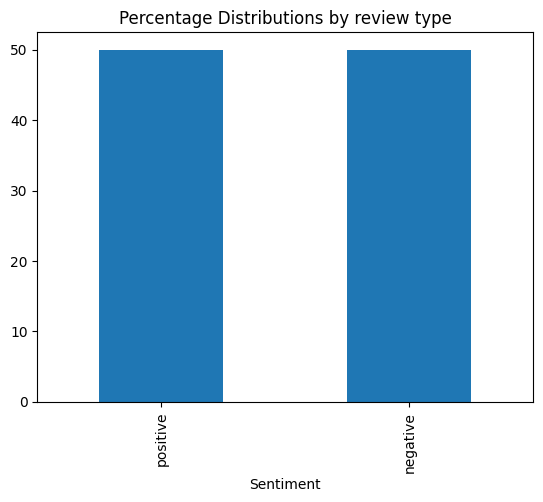

In [100]:
# Print a header for the percentage distribution of each sentiment
print('Percentage for default\n')
# Calculate and print the percentage distribution of each sentiment type
print(round(df.Sentiment.value_counts(normalize=True)*100,2))
# Plot the percentage distribution of sentiments as a bar chart
round(df.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [101]:
# Define independent and dependent variables for model training
independent_var = df['cleaned_text_new']
dependent_var = df['Sentiment']
# Split the data into training and test sets
IV_train, IV_test, DV_train, DV_test = train_test_split(independent_var, dependent_var, test_size=0.1, random_state=225)

# Print the sizes of the training and test sets
print('IV_train:', len(IV_train))
print('IV_test:', len(IV_test))
print('DV_train:', len(DV_train))
print('DV_test:', len(DV_test))

IV_train: 27867
IV_test: 3097
DV_train: 27867
DV_test: 3097


In [102]:
# Initialize the TF-IDF vectorizer for converting text data into numerical features
tvec = TfidfVectorizer()
# Initialize the logistic regression classifier with the 'lbfgs' solver
# 'lbfgs' is an optimization algorithm for training the model
clf2 = LogisticRegression(solver = "lbfgs")

In [103]:
# Creating a pipeline with TfidfVectorizer and LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using TfidfVectorizer for feature extraction
    ('clf', LogisticRegression(solver='lbfgs'))  # Logistic Regression classifier
])

In [104]:
# Create a pipeline that first applies the TF-IDF vectorizer and then fits the logistic regression classifier
model = Pipeline([('vectorizer' , tvec),('classifier',clf2)])
# Train the pipeline model on the training data
model.fit(IV_train, DV_train)
# Make predictions on the test set
from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
# Compute and display the confusion matrix to evaluate the model's performance
confusion_matrix(predictions, DV_test)

array([[1277,  284],
       [ 259, 1277]])

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate and print the accuracy of the model
print("Accuracy :", accuracy_score(predictions, DV_test))
# Calculate and print the weighted precision of the model
print("Precision :", precision_score(predictions, DV_test, average = 'weighted'))
# Calculate and print the weighted recall of the model
print("Recall :", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy : 0.8246690345495641
Precision : 0.8247765165127892
Recall : 0.8246690345495641


In [106]:
# Predict the sentiment for a new example text
example = ['bad']
result = model.predict(example) # Use the trained model to predict the sentiment of the example
# Print the predicted sentiment for the example
print(result)

['negative']


In [107]:
# Predict the sentiment for a new example text
example = ['so good']
result = model.predict(example) # Use the trained model to predict the sentiment of the example
# Print the predicted sentiment for the example
print(result)

['positive']


In [108]:
# Define a dictionary of different models, each with a pipeline for text classification
models = {
    'Logistic Regression': Pipeline([  # Pipeline for Logistic Regression
        ('tfidf', TfidfVectorizer()),  # Convert text data into numerical features using TF-IDF
        ('clf', LogisticRegression(solver='lbfgs'))  # Train a logistic regression classifier
    ]),
    'Naive Bayes': Pipeline([  # Pipeline for Naive Bayes
        ('tfidf', TfidfVectorizer()),  # Convert text data into numerical features using TF-IDF
        ('clf', MultinomialNB())  # Train a Multinomial Naive Bayes classifier
    ]),
    'Random Forest': Pipeline([  # Pipeline for Random Forest
        ('tfidf', TfidfVectorizer()),  # Convert text data into numerical features using TF-IDF
        ('clf', RandomForestClassifier())  # Train a Random Forest classifier
    ])
}


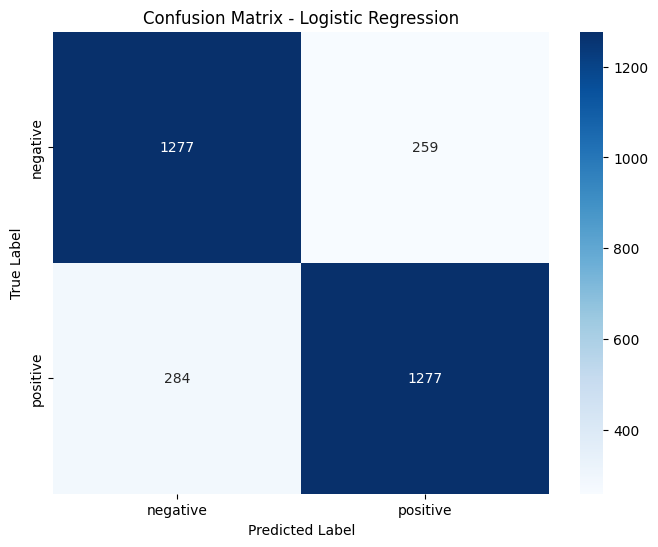

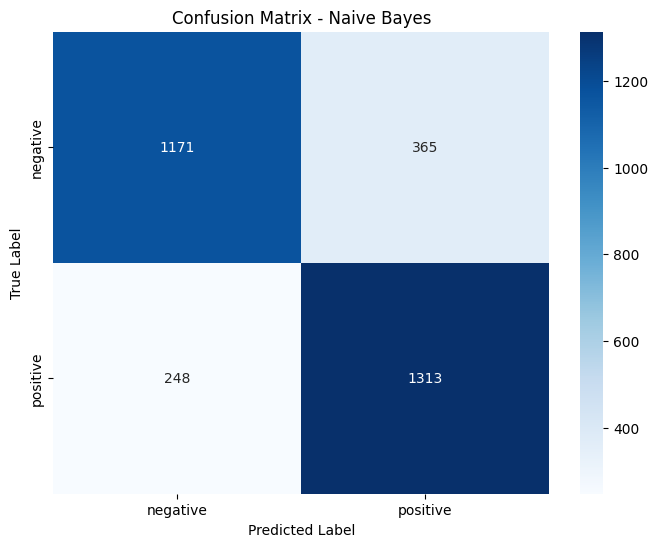

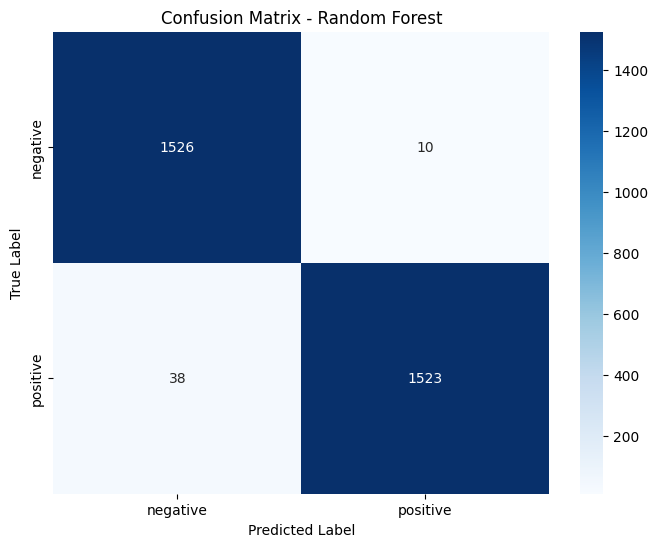

In [109]:
# Train each model and plot its confusion matrix
for name, model in models.items():  # Iterate over each model in the dictionary
    model.fit(IV_train, DV_train)   # Train the model on the training data
    preds = model.predict(IV_test)  # Predict on the test data
    cm = confusion_matrix(DV_test, preds) # Compute the confusion matrix


    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))  # Set the figure size for better readability
     # Annotate the heatmap with the confusion matrix values
      # Label axes with class names
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(DV_test)), yticklabels=sorted(set(DV_test)))
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [110]:
# Import the learning_curve function to analyze model performance
from sklearn.model_selection import learning_curve

In [111]:
# Define models using different machine learning algorithms
models = {
     # Logistic Regression model with a pipeline that includes:
    # 1. 'tfidf': A TfidfVectorizer to convert text data into numerical features.
    # 2. 'clf': A Logistic Regression classifier to perform the classification.
    'Logistic Regression': Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())]),
      # Naive Bayes model with a pipeline that includes:
    # 1. 'tfidf': A TfidfVectorizer to transform the text data.
    # 2. 'clf': A Multinomial Naive Bayes classifier for classification, suitable for text data.
    'Naive Bayes': Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())]),
      # Random Forest model with a pipeline that includes:
    # 1. 'tfidf': A TfidfVectorizer to transform the text data into numerical form.
    # 2. 'clf': A Random Forest classifier, which is an ensemble model made up of multiple decision trees.
    'Random Forest': Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier())])
}

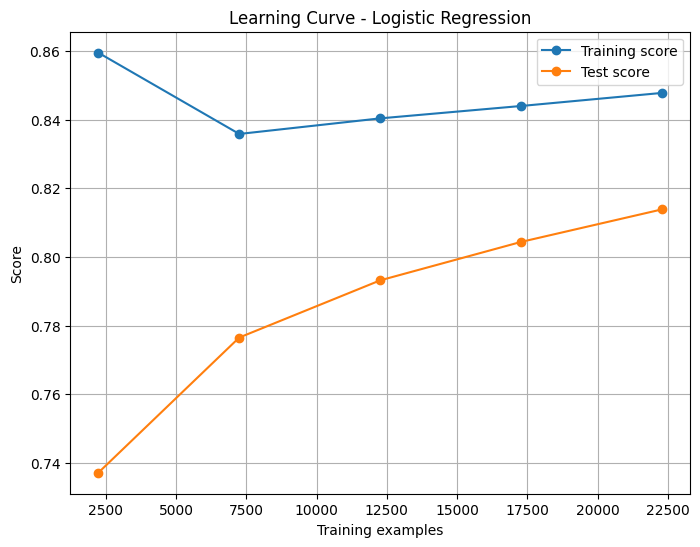

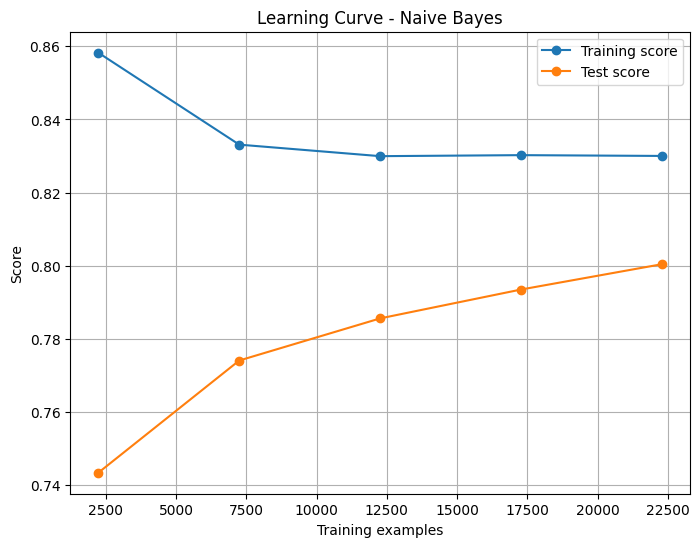

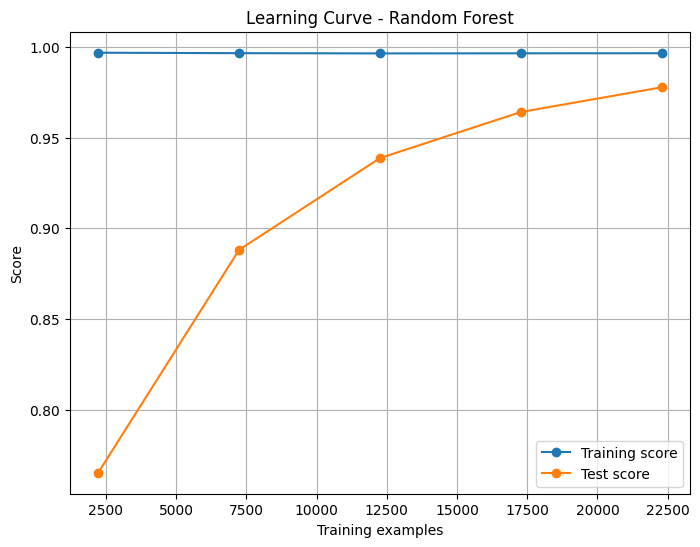

In [112]:
# Simple function to plot the learning curve for a given model
def plot_learning_curve(model, name, X, y):
  # Use learning_curve to get training and test scores for different training set sizes
  # cv=5 specifies 5-fold cross-validation
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)


    # Create a new figure for the plot with a specified size
    plt.figure(figsize=(8, 6))
    # Plot the training scores (average across the folds) against the training set sizes
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    # Plot the test scores (average across the folds) against the training set sizes
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Test score')
    # Add a title to the plot, showing the model name
    plt.title(f'Learning Curve - {name}')
    # Set the x-axis label to represent the number of training examples
    plt.xlabel('Training examples')
    # Set the y-axis label to represent the score (accuracy, or other metric)
    plt.ylabel('Score')
    # Display a legend to differentiate between the training and test scores
    plt.legend()
    # Add a grid for better visualization
    plt.grid()
    # Display the plot
    plt.show()

# Loop over each model in the dictionary and plot the learning curve
for name, model in models.items():
# Call the function to plot the learning curve for each model using the training data
    plot_learning_curve(model, name, IV_train, DV_train)

In [113]:
import plotly.graph_objects as go
# Model names and their performance metrics (Accuracy, Precision, Recall)
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracies = [0.8246690345495641, 0.8020665159832095, 0.9857927026154343]
precisions = [0.8247765165127892, 0.8036815426042666, 0.9859111813310149]
recalls = [0.8246690345495641, 0.8020665159832095, 0.9857927026154343]

# Create bar traces for accuracy, precision, and recall for each model
trace1 = go.Bar(x=models, y=accuracies, name='Accuracy')
trace2 = go.Bar(x=models, y=precisions, name='Precision')
trace3 = go.Bar(x=models, y=recalls, name='Recall')

In [114]:
# Combine the bar traces into a single list
data = [trace1, trace2, trace3]

# Create the layout for the plot
layout = go.Layout(
    title='Model Comparison: Accuracy, Precision, and Recall', # Set the title of the plot
    xaxis={'title': 'Models'},  # Label for the x-axis
    yaxis={'title': 'Score'}, # Label for the y-axis
    barmode='group'  # Group the bars for better comparison across models
)

# Create the figure and show it
fig = go.Figure(data=data, layout=layout)
fig.show()

In [115]:
# Define the independent and dependent variables
# independent_var holds the cleaned textual data, which will be used as input features

independent_var = df['cleaned_text_new'] # Processed text data (features)

# dependent_var holds the target variable, which is the sentiment of each review
dependent_var = df['Sentiment'] # Target labels (positive or negative sentiment)

In [116]:
# Split the data into training and test sets
#IV_train, IV_test, DV_train, DV_test = train_test_split(independent_var, dependent_var, test_size=0.1, random_state=225)

In [117]:
# Define multiple model pipelines with different classifiers
pipelines = {
    'Logistic Regression': Pipeline([   # Pipeline for Logistic Regression
        ('tfidf', TfidfVectorizer()),    # Convert text data to numerical features using TF-IDF
        ('clf', LogisticRegression(solver='lbfgs'))  # Logistic Regression classifier
    ]),
    'Naive Bayes': Pipeline([  # Pipeline for Naive Bayes
        ('tfidf', TfidfVectorizer()),  # Convert text data to numerical features using TF-IDF
        ('clf', MultinomialNB())    # Multinomial Naive Bayes classifier
    ]),
    'Random Forest': Pipeline([  # Pipeline for Random Forest
        ('tfidf', TfidfVectorizer()),   # Convert text data to numerical features using TF-IDF
        ('clf', RandomForestClassifier())   # Random Forest classifier
    ])
}

In [118]:
# Fit each model pipeline to the training data
for name, pipeline in pipelines.items():   # Iterate over each pipeline in the dictionary
    pipeline.fit(IV_train, DV_train)        # Train the model using the training data (IV_train and DV_train)

In [119]:
# Select the 6th row (index 5) from the 'cleaned_text_new' column
filtered_row = df.iloc[5]['cleaned_text_new']

In [120]:
# Display the value of the filtered row
filtered_row

'i absolutely love this recipe  tweaked it quite a bit when i want a spicier chili i exchange the green chilis for canned diced jalapenos  so good that way i also add an extra  can of green chilisdiced jalapenos to it every time i make it it does not double well but have made  times the recipe and  great for extra large crowdsplenty of leftovers  a great snow day recipe  made it  times these past  weeks'

In [121]:
# Single phrase for prediction
phrase = ["i absolutely love this recipe  tweaked it quite a bit when i want a spicier chili i exchange the green chilis for canned diced jalapenos  so good that way i also add an extra  can of green chilisdiced jalapenos to it every time i make it it does not double well but have made  times the recipe and  great for extra large crowdsplenty of leftovers  a great snow day recipe  made it  times these past  weeks"]

In [122]:

# Use each model pipeline to predict the sentiment of the given phrase
for name, pipeline in pipelines.items(): # Iterate through each model pipeline
    prediction = pipeline.predict(phrase)[0] # Predict the sentiment for the phrase and get the first result
    print(f"{name} Prediction: {prediction}")  # Print the model name and its prediction

Logistic Regression Prediction: positive
Naive Bayes Prediction: positive
Random Forest Prediction: positive


In [125]:
# Single phrase for prediction
phrase = ["Not good"]

In [126]:
# Use each model pipeline to predict the sentiment of the given phrase
for name, pipeline in pipelines.items():
    prediction = pipeline.predict(phrase)[0]
    print(f"{name} Prediction: {prediction}")

Logistic Regression Prediction: negative
Naive Bayes Prediction: negative
Random Forest Prediction: negative
